<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style="border:2px solid black"> </hr>


**What?** 5 Statistical Paradoxes



# What is a 5-number summary?
<hr style="border:2px solid black"> </hr>


- In this article, we will explore 5 statistical paradoxes data scientists should be aware of: the accuracy paradox, the False Positive Paradox, Gambler’s Fallacy, Simpson’s Paradox, and Berkson’s paradox.
- Each of these paradoxes may be the potential reason for getting the unreliable result of your analysis.
    


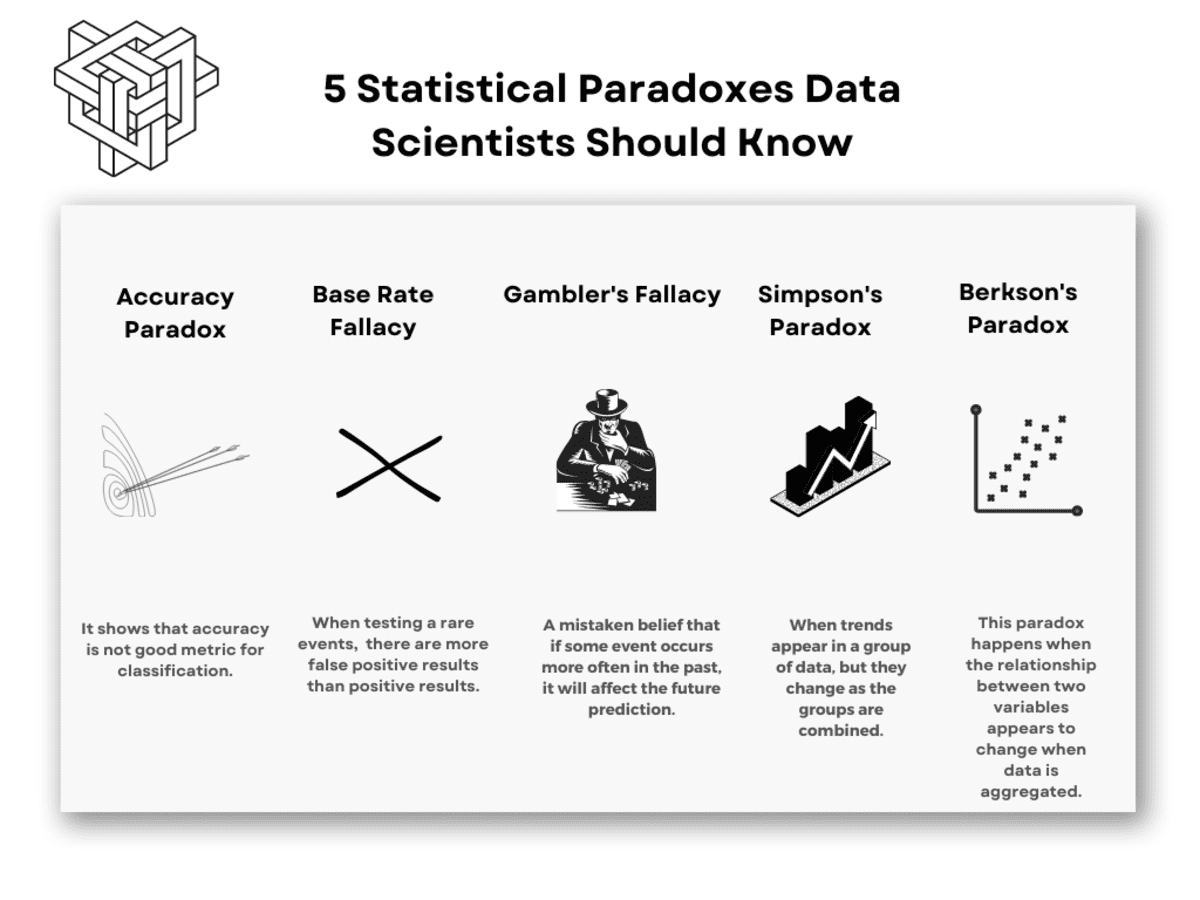

# Imports
<hr style="border:2px solid black"> </hr>

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
import numpy as np
from sklearn.base import BaseEstimator
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import linregress

# Accuracy paradox
<hr style="border:2px solid black"> </hr>


- Accuracy shows that accuracy is not a good evaluation metric when it comes to classifying.
- Suppose you are analyzing a dataset that contains 1000 patient metrics. You want to catch a rare kind of disease, which will eventually be shown itself in 5% of the population. So overall, you have to find 50 people in 1000.
- Even if you always say that the people do not have a disease, your accuracy will be 95%. And your model can't catch a single sick person in this cluster. (0/50)
    


In [3]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)
y_train_6 = y_train == 6


class DumbClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


dumb_clf = DumbClassifier()

cross_val_score(dumb_clf, x_train, y_train_6, cv=3, scoring="accuracy")

array([0.90333333, 0.89632107, 0.89966555])


- What does it mean? That means even if you create an estimator that will never estimate 6 and you put that in your model, the accuracy can be over 90%. 
- Why? Because 9 other numbers exist in our dataset. So if you say the number is not 6, you will be right 9/10 times.



# False Positive Paradox
<hr style="border:2px solid black"> </hr>


- Now, the false positive paradox is a statistical phenomenon that can occur when we test for the presence of a rare event or condition.
- It is also known as the “base rate fallacy” or “base rate neglect”.
- This paradox means there are more false positive results than positive results when testing rare events.



In [12]:
# Number of normal transactions
normal_count = 9999
fraud_count = 1 #?

# Number of fraudulent transactions
true_positive = 1

# Number of normal transactions flagged as fraudulent by the model 5%
false_positives = 499.95

# Number of fraudulent transactions flagged as normal by the model
false_negatives = 0

# Calculate precision
precision = (true_positive) / true_positive + false_positives
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = (fraud_count) / fraud_count + false_negatives
print(f"Recall: {recall:.2f}")

# Calculate accuracy
accuracy = (
    normal_count - false_positives + fraud_count - false_negatives
) / (normal_count + fraud_count)
print(f"Accuracy: {accuracy:.2f}")

Precision: 500.95
Recall: 1.00
Accuracy: 0.95



- Imagine you are working on an ML model to detect fraudulent credit card transactions. The dataset you are working with includes a large number of normal (non-fraudulent) transactions and a small number of fraudulent transactions. Yet when you deploy your model in the real world, you find that it produces a large number of false positives.
- After further investigation, you realize that the prevalence of fraudulent transactions in the real world is much lower than in the training dataset.
- Let’s say 1/10,000 transactions will be fraudulent, and suppose the test also has a 5% rate of false positives.

```
TP = 1 out of 10,000
FP = 10,000*(100-40)/100*0,05 = 499,95 out of 9,999
```

- So when a fraudulent transaction is found, what is the possibility that it really is a fraudulent transaction? `P = 1/500,95 =0,001996`
- The result is nearly 0.2%. It means when the event gets flagged as fraudulent, there is only a 0.2% probability that it really is a fraudulent event. And that is a false positive paradox.



# Gambler’s Fallacy
<hr style="border:2px solid black"> </hr>


- Gambler’s fallacy, also known as the Monte Carlo fallacy, is the mistaken belief that if an event happens more frequently than its normal probability, it will happen more often in the following trials.
- Imagine that you are building a machine learning model to predict whether the customer will churn based on their past behavior. Now, you collected many different types of data, including the number of customers interacting with the services, the length of time they have been a customer, the number of complaints they have made, and more. At this point, you can be tempted to think a customer who has been with the service for a long time is less likely to churn because they have shown a commitment to the service in the past. However, this is an example of a gambler’s fallacy because the probability of a customer churning is not influenced by the length of time they have been a customer. The probability of churn is determined by a wide range of factors, including the quality of the service, the customer's satisfaction with the service, and more of these factors. So if you build a machine learning model, be careful explicitly not to create a column that includes the length of a customer and try to explain the model by using that. At this point, you should realize that this might ruin your model due to Gambler’s fallacy
    


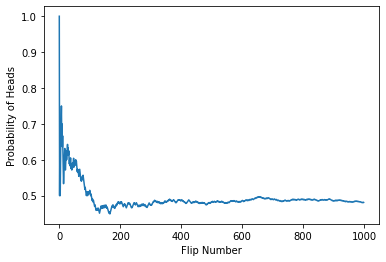

In [15]:
# Set up the plot
plt.xlabel("Flip Number")
plt.ylabel("Probability of Heads")

# Initialize variables
num_flips = 1000
num_heads = 0
probabilities = []

# Simulate the coin flips
for i in range(num_flips):
    if (
        random.random() > 0.5
    ):  # random() generates a random float between 0 and 1
        num_heads += 1
    probability = num_heads / (i + 1)  # Calculate the probability of heads
    probabilities.append(probability)  # Record the probability
# Plot the results
plt.plot(probabilities)
plt.show()

# Simpsons Paradox
<hr style="border:2px solid black"> </hr>


- This paradox happens when the relationship between two variables appears to change when data is aggregated.
- To explain Simpson’s paradox, we will calculate the mean of the average tips women and men made during lunch and overall by using the tips data set. The tips dataset contains data on tips given by customers at a restaurant, like total tips, sex, day, time, and more.
- The tips dataset is a collection of data on tips given by customers at a restaurant. It includes information such as the tip amount, the gender of the customer, the day of the week, and the time of day. The dataset can be used to analyze customers' tipping behavior and identify trends in the data.



In [17]:
# Load the tips dataset
tips = sns.load_dataset("tips")

# Calculate the tip percentage for men and women at lunch
men_lunch_tip_pct = (
    tips[(tips["sex"] == "Male") & (tips["time"] == "Lunch")]["tip"].mean()
    / tips[(tips["sex"] == "Male") & (tips["time"] == "Lunch")][
        "total_bill"
    ].mean()
)
women_lunch_tip_pct = (
    tips[(tips["sex"] == "Female") & (tips["time"] == "Lunch")]["tip"].mean()
    / tips[(tips["sex"] == "Female") & (tips["time"] == "Lunch")][
        "total_bill"
    ].mean()
)

# Calculate the overall tip percentage for men and women
men_tip_pct = (
    tips[tips["sex"] == "Male"]["tip"].mean()
    / tips[tips["sex"] == "Male"]["total_bill"].mean()
)
women_tip_pct = (
    tips[tips["sex"] == "Female"]["tip"].mean()
    / tips[tips["sex"] == "Female"]["total_bill"].mean()
)

# Create a data frame with the average tip percentages
data = {
    "Lunch": [men_lunch_tip_pct, women_lunch_tip_pct],
    "Overall": [men_tip_pct, women_tip_pct],
}
index = ["Men", "Women"]
df = pd.DataFrame(data, index=index)
df

,Lunch,Overall
Men,0.159688,0.148940
Women,0.158078,0.156918



- As we can see, the average tip is bigger when it comes to lunch between men and women. Yet when data is aggregated, the mean is changed.
- When observing the trend from the subset version and extracting meaning from them, be careful not to forget to check whether this trend is still the case for the whole data set or not. Because as you can see, there might not be the case in special circumstances. 
    


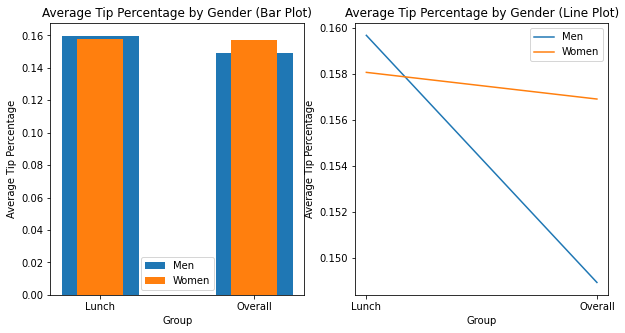

In [19]:
# Set the group labels
labels = ["Lunch", "Overall"]

# Set the bar heights
men_heights = [men_lunch_tip_pct, men_tip_pct]
women_heights = [women_lunch_tip_pct, women_tip_pct]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create the bar plot
ax1.bar(labels, men_heights, width=0.5, label="Men")
ax1.bar(labels, women_heights, width=0.3, label="Women")
ax1.set_title("Average Tip Percentage by Gender (Bar Plot)")
ax1.set_xlabel("Group")
ax1.set_ylabel("Average Tip Percentage")
ax1.legend()

# Create the line plot
ax2.plot(labels, men_heights, label="Men")
ax2.plot(labels, women_heights, label="Women")
ax2.set_title("Average Tip Percentage by Gender (Line Plot)")
ax2.set_xlabel("Group")
ax2.set_ylabel("Average Tip Percentage")
ax2.legend()

# Show the plot
plt.show()

# Berkson’s Paradox
<hr style="border:2px solid black"> </hr>


- Berkson’s Paradox is a statistical paradox that happens when two variables correlated to each other in data, yet when the data will subsetted, or grouped, this correlation is not observed & changed.
- In simple terms, Berkson's Paradox is when a correlation appears to be different in different subgroups of the data.



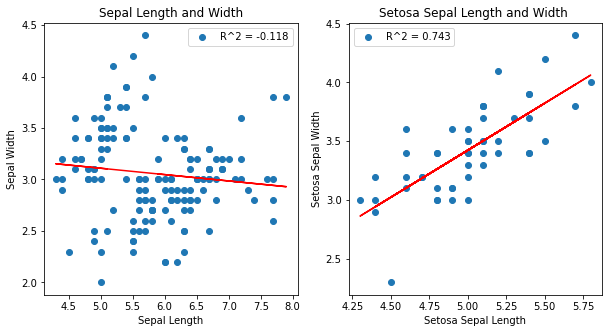

In [21]:
# Load the iris data set
df = sns.load_dataset("iris")

# Subset the data to only include setosa species
df_s = df[df["species"] == "setosa"]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the relationship between sepal length and width.
slope, intercept, r_value, p_value, std_err = linregress(
    df["sepal_length"], df["sepal_width"]
)
ax1.scatter(df["sepal_length"], df["sepal_width"])
ax1.plot(
    df["sepal_length"],
    intercept + slope * df["sepal_length"],
    "r",
    label="fitted line",
)
ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Sepal Width")
ax1.set_title("Sepal Length and Width")
ax1.legend([f"R^2 = {r_value:.3f}"])

# Plot the relationship between setosa sepal length and width for setosa.
slope, intercept, r_value, p_value, std_err = linregress(
    df_s["sepal_length"], df_s["sepal_width"]
)
ax2.scatter(df_s["sepal_length"], df_s["sepal_width"])
ax2.plot(
    df_s["sepal_length"],
    intercept + slope * df_s["sepal_length"],
    "r",
    label="fitted line",
)
ax2.set_xlabel("Setosa Sepal Length")
ax2.set_ylabel("Setosa Sepal Width")
ax2.set_title("Setosa Sepal Length and Width ")
ax2.legend([f"R^2 = {r_value:.3f}"])

# Show the plot
plt.show()


- You can see the changes between sepal length and within the setosa species. Actually, it shows a different correlation than other species.
- Also, you can see that setosa’s different correlation in the first graph. In the second graph, you can see that the correlation between sepal width and sepal length has changed. When analyzing all data set, it shows that when sepal length increases, sepal width decreases. However, if we start analyzing by selecting setosa species, the correlation is now positive and shows that when sepal width increases, sepal length increases as well.
    


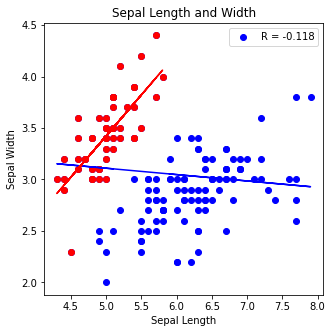

In [22]:
# Load the tips data set
df = sns.load_dataset("iris")

# Subset the data to only include setosa species
df_s = df[df["species"] == "setosa"]

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(5, 5))

# Plot the relationship between sepal length and width.
slope, intercept, r_value_1, p_value, std_err = linregress(
    df["sepal_length"], df["sepal_width"]
)
ax1.scatter(df["sepal_length"], df["sepal_width"], color="blue")
ax1.plot(
    df["sepal_length"],
    intercept + slope * df["sepal_length"],
    "b",
    label="fitted line",
)

# Plot the relationship between setosa sepal length and width for setosa.
slope, intercept, r_value_2, p_value, std_err = linregress(
    df_s["sepal_length"], df_s["sepal_width"]
)
ax1.scatter(df_s["sepal_length"], df_s["sepal_width"], color="red")
ax1.plot(
    df_s["sepal_length"],
    intercept + slope * df_s["sepal_length"],
    "r",
    label="fitted line",
)

ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Sepal Width")
ax1.set_title("Sepal Length and Width")
ax1.legend([f"R = {r_value_1:.3f}"])

# References
<hr style="border:2px solid black"> </hr>


- [5 Statistical Paradoxes Data Scientists Should Know](https://www.kdnuggets.com/2023/02/5-statistical-paradoxes-data-scientists-know.html)

